# Exploratory Data Analysis

## Operational

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the file into a DataFrame
file_path = '..\data\IndexData.csv'
df = pd.read_csv(file_path)

# 1. EDA Visualizations
## 1.1. Missing and Zero Values Visualization

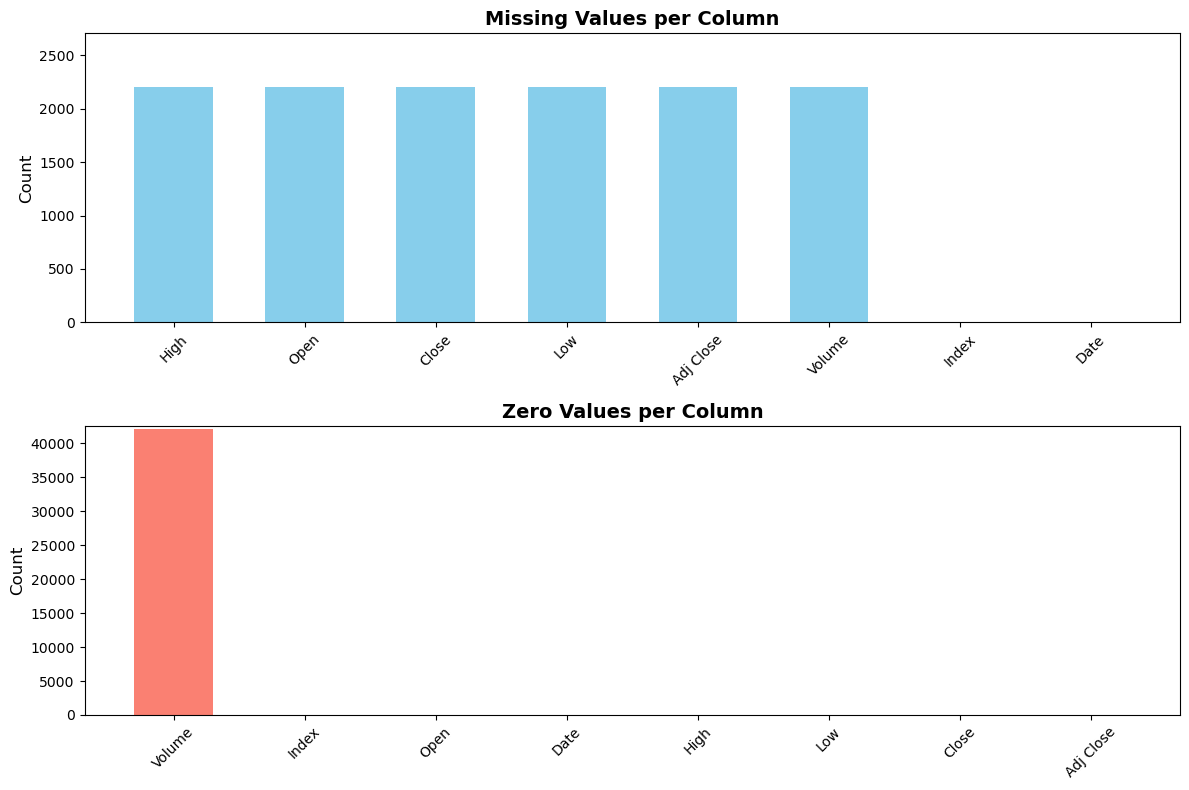

In [3]:
import matplotlib.pyplot as plt

# Create a 2-row figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # Adjusted figsize for better proportions
plt.subplots_adjust(hspace=0.4)

# Missing values (NaN)
missing_counts = df.isna().sum().sort_values(ascending=False)
axes[0].bar(missing_counts.index, missing_counts.values, color='skyblue', width=0.6)  # Bar width adjusted
axes[0].set_title('Missing Values per Column', fontsize=14, weight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Zero values
zero_counts = (df == 0).sum().sort_values(ascending=False)
axes[1].bar(zero_counts.index, zero_counts.values, color='salmon', width=0.6)  # Consistent bar width
axes[1].set_title('Zero Values per Column', fontsize=14, weight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Set a consistent y-axis limit if relevant
axes[0].set_ylim(0, missing_counts.max() + 500)  # Add some padding
axes[1].set_ylim(0, zero_counts.max() + 500) 

plt.tight_layout()
plt.show()


## 1.3. Distribution of Open, Close, High, and Low Values

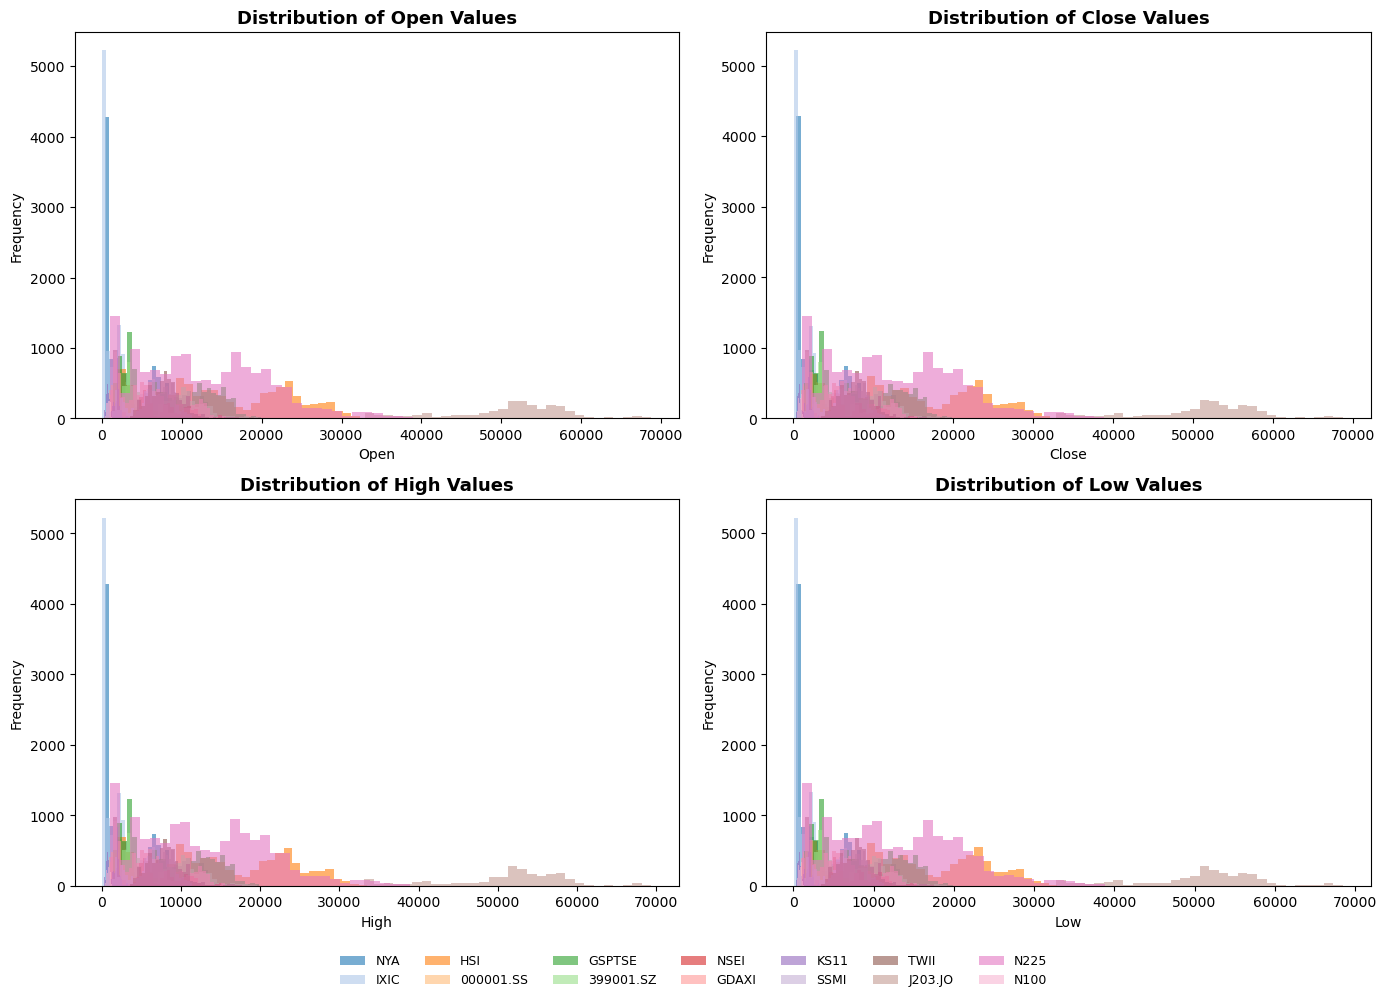

In [4]:
# Visualization Initialization
index_col = 'Index' 
unique_indices = df[index_col].unique()

# Generate a distinct color for each index (14 total)
colors = sns.color_palette("tab20", len(unique_indices))
color_map = dict(zip(unique_indices, colors))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
columns = ['Open', 'Close', 'High', 'Low']

for ax, col in zip(axes, columns):
    for idx in unique_indices:
        subset = df[df[index_col] == idx]
        ax.hist(subset[col].dropna(), bins=30, color=color_map[idx], alpha=0.6, label=idx)
    ax.set_title(f'Distribution of {col} Values', fontsize=13, weight='bold')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')

# Add a single legend below all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=7, frameon=False, fontsize=9)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # gap to fit legend
plt.show()


## 1.4. Distribution of Volume Values

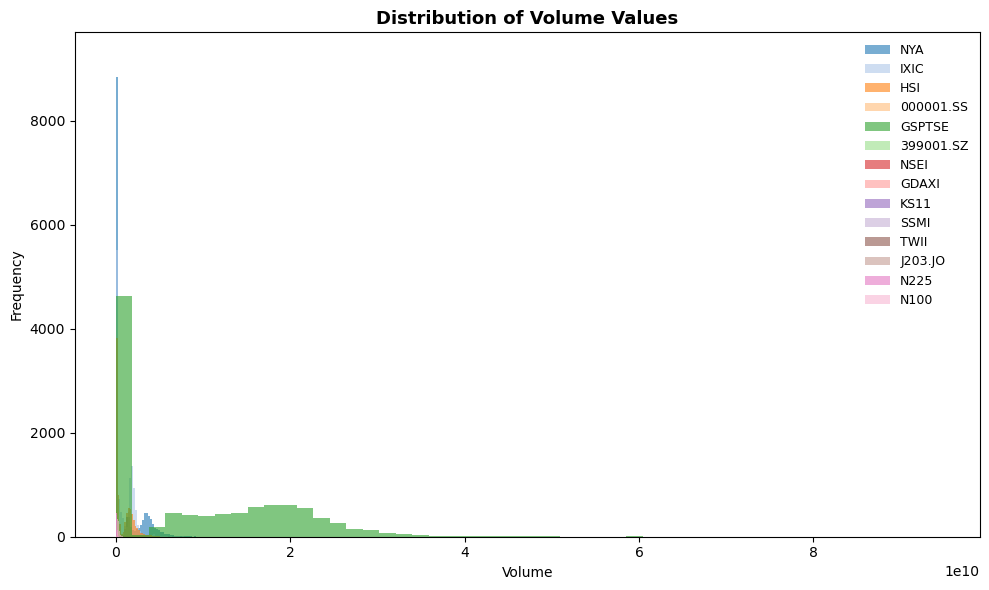

In [5]:
# Visualize Volume distribution separately
plt.figure(figsize=(10, 6))

# Plot Volume distribution for each index
for idx in unique_indices:
    subset = df[df[index_col] == idx]
    plt.hist(subset['Volume'].dropna(), bins=50, color=color_map[idx], alpha=0.6, label=idx)
plt.title('Distribution of Volume Values', fontsize=13, weight='bold')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend(loc='upper right', frameon=False, fontsize=9)
plt.tight_layout()
plt.show()

In [6]:
# Summary for Zero Volume
zero_volume = df[df['Volume'] == 0]
print(f'Total records with zero Volume: {len(zero_volume)}','\n')

# Summary for Zero Volume per Index
zero_volume_per_index = zero_volume[index_col].value_counts()
print("Zero Volume per Index:")
print(zero_volume_per_index)


Total records with zero Volume: 42093 

Zero Volume per Index:
Index
N225         9239
NYA          8832
HSI          3602
IXIC         3457
SSMI         3039
GDAXI        2974
J203.JO      2346
N100         1657
399001.SZ    1570
000001.SS    1361
TWII         1353
GSPTSE       1343
NSEI         1320
Name: count, dtype: int64


# Data Cleaning

# Feature Engineering